# CS 1656 – Introduction to Data Science 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li
### Additional credits: Tahereh Arabghalizi, Evangelos Karageorgos, Zuha Agha, Anatoli Shein, Phuong Pham
## Recitation 4: SQL via Data API
---
In this recitation, you will execute SQL queries on real data by connecting to the open data portal of [Western Pennsylavnia Regional Data Center](https://www.wprdc.org/) and requesting data via API calls.  

In [1]:
import json
from datetime import datetime, timedelta, date
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

We will be using Allegheny County Restaurant/Food Facility Inspection Violation Dataset found here https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations. This dataset contains violation data from actual routine inspections by one of health department staff's members for the last two years. It should be fun to find out inspection results for places where we eat in Pittsburgh! =)

In [2]:
wprdc_api_endpoint = "https://data.wprdc.org/api/3/action/datastore_search_sql"

# id for database table
resource_id = "1a1329e2-418c-4bd3-af2c-cc334e7559af"

# Get the date from 9 months ago)
start_date = datetime.now() - timedelta(days=270)

# Convert to a string the format the the data center accepts (yyyy-mm-dd)
start_str = start_date.strftime("%Y-%m-%d")

# SQL query we'll use in API call to request data
query = """
SELECT *
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' """.format(resource_id, start_str, "Pittsburgh")

# Make WPRDC API Call
response = requests.get(wprdc_api_endpoint, {'sql': query})

# Parse response JSON into python dictionary
response_data = json.loads(response.text)

# Convert dictionary to dataframe
df = pd.DataFrame.from_dict(response_data['result']['records'])

# Print the number of rows
print(df.shape[0], "rows total")

df.head()


17554 rows total


,_full_text,_geom,_id,_the_geom_webmercator,bus_st_date,city,description,description_new,encounter,end_time,...,medium,municipal,num,placard_st,rating,start_time,state,street,url,zip
0,'-07':6 '-19':7 '/reports/rwservlet?food_rep_i...,None,175907,None,2019-07-19,Pittsburgh,Restaurant with Liquor,Plumbing,201907190044,17:10:00,...,F,Mt Lebanon,1573,1,V,15:25:00,PA,McFarland Road,http://appsrv.achd.net/reports/rwservlet?food_...,15216.0
1,'-01':7 '-07':6 '-102':32 '/reports/rwservlet?...,None,175594,None,2019-07-01,Pittsburgh,Chain Restaurant with Liquor,Probe-Type Thermometers,201907010008,12:00:00,...,F,Pittsburgh-102,425,1,V,10:15:00,PA,Forbes Avenue,http://appsrv.achd.net/reports/rwservlet?food_...,15219.0
2,'-01':10 '-07':9 '-102':32 '/reports/rwservlet...,None,175595,None,2019-07-01,Pittsburgh,Chain Restaurant with Liquor,Cleaning and Sanitization,201907010008,12:00:00,...,F,Pittsburgh-102,425,1,V,10:15:00,PA,Forbes Avenue,http://appsrv.achd.net/reports/rwservlet?food_...,15219.0
3,'-01':8 '-07':7 '-102':31 '/reports/rwservlet?...,None,175596,None,2019-07-01,Pittsburgh,Chain Restaurant with Liquor,Handwashing Facilities,201907010008,12:00:00,...,F,Pittsburgh-102,425,1,V,10:15:00,PA,Forbes Avenue,http://appsrv.achd.net/reports/rwservlet?food_...,15219.0
4,'-01':8 '-07':7 '-102':35 '/reports/rwservlet?...,None,175597,None,2019-07-01,Pittsburgh,Chain Restaurant with Liquor,"Fabrication, Design, Installation and Maintenance",201907010008,12:00:00,...,F,Pittsburgh-102,425,1,V,10:15:00,PA,Forbes Avenue,http://appsrv.achd.net/reports/rwservlet?food_...,15219.0


Details of dataset attributes are below. (Taken from https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations/resource/1a1329e2-418c-4bd3-af2c-cc334e7559af)


## Queries

__Q1) Find all unique decription categories of violation in Pittsburgh restaurants over the past nine months.__

In [3]:
query = """
SELECT DISTINCT "description_new"
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' """.format(resource_id, start_str, "Pittsburgh")

response = requests.get(wprdc_api_endpoint, {'sql': query})
df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,description_new
0,Plumbing
1,Hot Holding Temperatures
2,Handwashing Facilities
3,"Fabrication, Design, Installation and Maintenance"
4,General Premises
5,Lighting
6,Date Marking of Food
7,Toilet Room
8,Ventilation
9,Cold Holding Temperatures


__Q2) Find restaurants in Pittsburgh with no violations in at least one decription category over the past nine months.__

In [4]:
query = """
SELECT "facility_name", COUNT("description_new")
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' AND "rating" <> '{}'
GROUP BY "facility_name" """.format(resource_id, start_str, "Pittsburgh", "V")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,count,facility_name
0,1,A Custom Catering & Banquet/Rte 28 Restaurant
1,1,Apollo Cafe
2,1,Atria's Restaurant & Tavern
3,1,Azimers Pizza Place
4,1,Bae Bae's Kitchen
5,1,Bar 3 Millvale
6,1,Barb's Country Kitchen
7,2,Bea Taco Town #2
8,1,Bella Christie & Lil' Z's Sweet Boutique
9,1,Beta Bites


### Tasks

__T1) Find top 30 restaurants in Pittsburgh with maximum number of violations.__

In [45]:
query = """
SELECT "facility_name", COUNT("_id")
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' 
GROUP BY "facility_name" 
ORDER BY COUNT("encounter") DESC
""".format(resource_id, start_str, "Pittsburgh")


response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df[0:30]

,count,facility_name
0,68,McDonald's
1,56,Steel Cactus
2,53,Subway Sandwiches & Salads
3,51,Winghart's
4,49,Patron Mexican Grill
5,48,Yamato Hibachi Grill
6,47,Atria's Restaurant & Tavern
7,46,Jade Grille
8,44,Dragon Town
9,43,Tom's Diner / Vasta Inn


Lets look more closely into the inspection results of Pitt facilities.

__T2) Find the category descriptions and their high, medium, low risk ratings for all violations at facilities that start with 'Pitt' over the past nine months.__

In [24]:
query = """
SELECT "facility_name", "description", "low", "medium", "high"
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' AND "facility_name" LIKE 'Pitt%'
""".format(resource_id, start_str, "Pittsburgh")


response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,description,facility_name,high,low,medium
0,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,T,F,F
1,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,F,F,T
2,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,F,T,F
3,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,T,T,F
4,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,F,T,F
5,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,F,T,F
6,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,F,T,F
7,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,None,T,None
8,Seasonal/Pool Snack Bar,Pittsburgh Field Club Pool Snack Bar,None,T,None
9,Retail/Convenience Store,Pittsburgh Exchange (AC-14),None,None,None


Now lets look at all facilities that contain word 'Pitt'.

__T3) Find the category descriptions and their high, medium, low risk ratings for all violations at all facilities that have word 'Pitt' in their name over the past nine months. Note that results that contain word 'Pitt' as part of another word (e.g. 'Pittsburgh') should not be included__

In [36]:
query = """
SELECT "facility_name", "description", "low", "medium", "high"
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' 
AND ("facility_name" LIKE '%Pitt%' OR "facility_name" LIKE '%Pitt' OR "facility_name" LIKE 'Pitt%')
AND ("facility_name" NOT LIKE '%Pittsburgh%')

""".format(resource_id, start_str, "Pittsburgh")


response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,description,facility_name,high,low,medium
0,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,F,F,T
1,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,F,F,T
2,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,T,F,F
3,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,F,F,F
4,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,T,T,F
5,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,F,T,F
6,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,F,T,F
7,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,None,T,None
8,University Food Service,Pitt Dining Litchfield Tower (A) / Market Cent...,None,T,None
9,Chain Restaurant without Liquor,Starbucks Coffee #27117 (Pitt - Amos Hall),F,T,F


__T4) Find top 20 facilities that have word 'Pitt' in their name and have the highest counts of violations over the past nine months.__

In [62]:
query = """
SELECT "facility_name", COUNT("encounter")
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' 
AND ("facility_name" LIKE '%Pitt%' OR "facility_name" LIKE '%Pitt' OR "facility_name" LIKE 'Pitt%')
GROUP BY "facility_name" 
ORDER BY COUNT("encounter") DESC

""".format(resource_id, start_str, "Pittsburgh")


response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df[0:20]

,count,facility_name
0,24,Wyndham Garden Pittsburgh Airport / Keystone C...
1,23,McFadden's Pittsburgh
2,19,Fat Daddy's Pittsburgh Barbeque
3,15,Pittsburgh Field Club Pool Snack Bar
4,15,Pittsburgh Sports Bar & Grill
5,14,Ace Hotel Pittsburgh / Whitfield Restaurant
6,11,Manor Care Health Services Pittsburgh
7,10,Crowne Plaza - Pittsburgh South Gather
8,9,Pitt Dining Litchfield Tower (A) / Market Cent...
9,9,Pittsburgh Plaza Hotel / Bistro 401


Let's make a bar graph of these counts now

__T5) Create a bar graph of the counts from T4).__

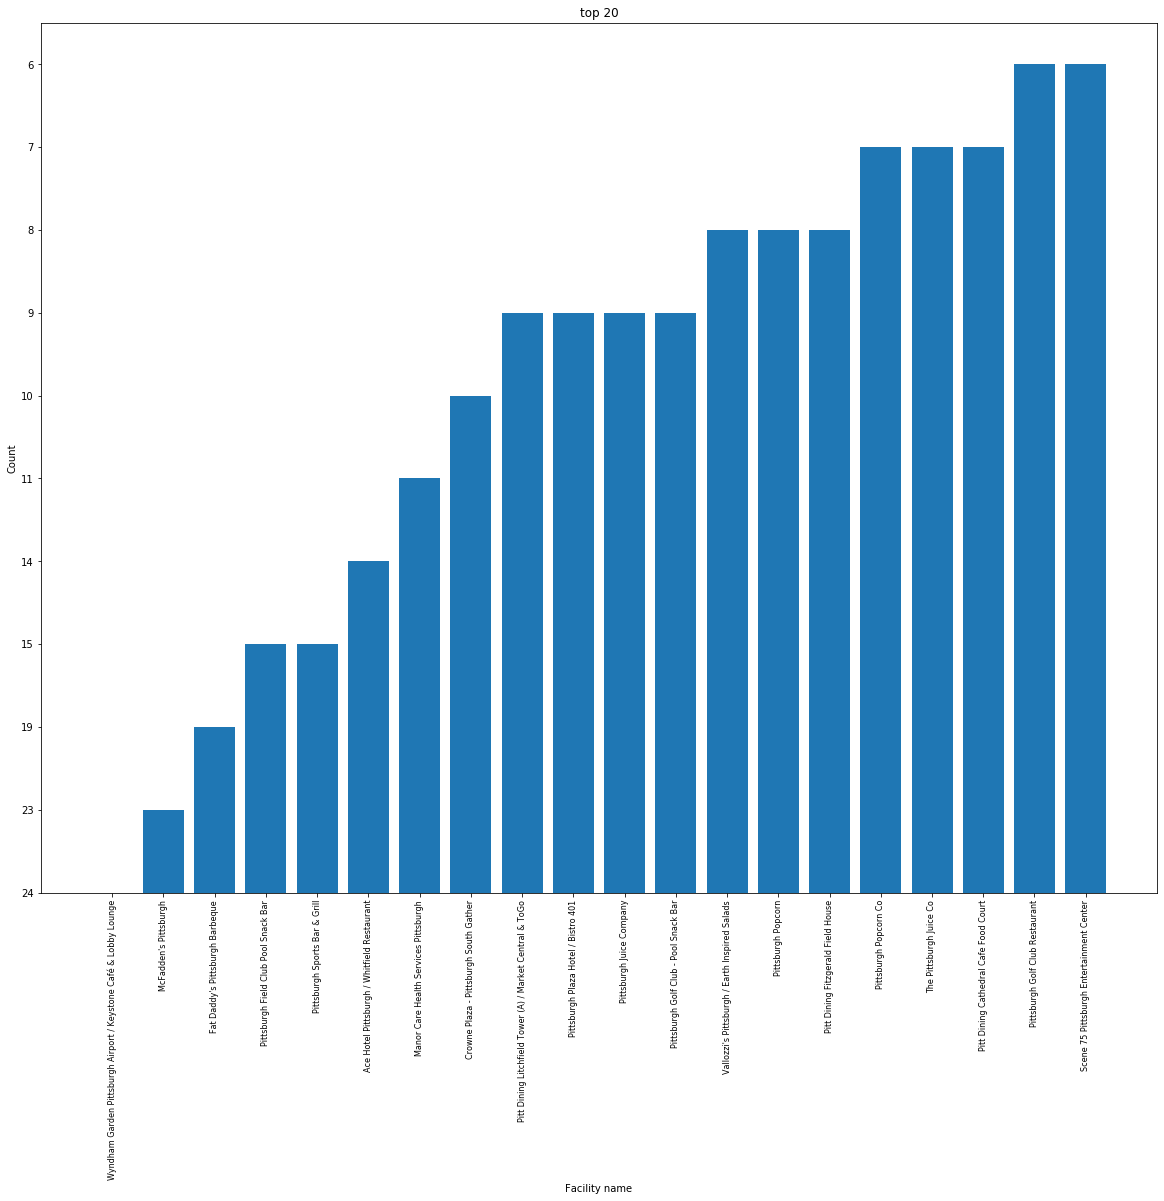

In [67]:
query = """
SELECT "facility_name", COUNT("encounter") as c
FROM "{}"
WHERE "inspect_dt" >= '{}' AND "city" = '{}' 
AND ("facility_name" LIKE '%Pitt%' OR "facility_name" LIKE '%Pitt' OR "facility_name" LIKE 'Pitt%')
GROUP BY "facility_name" 
ORDER BY COUNT("encounter") DESC
""".format(resource_id, start_str, "Pittsburgh")


response = requests.get(wprdc_api_endpoint, {'sql': query})
df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])
a = df[0:20]





fig = plt.figure(figsize=(20, 16))
plt.bar((a['facility_name']), a['c'],align = 'center')
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel('Facility name')
plt.ylabel('Count')
plt.title('top 20')

plt.savefig("bar_plot.png")
plt.show()